# DATA WRANGLING PROJECT - MUSKET FOOTBALL TEAM
                                     DONE BY JANE FRANK  

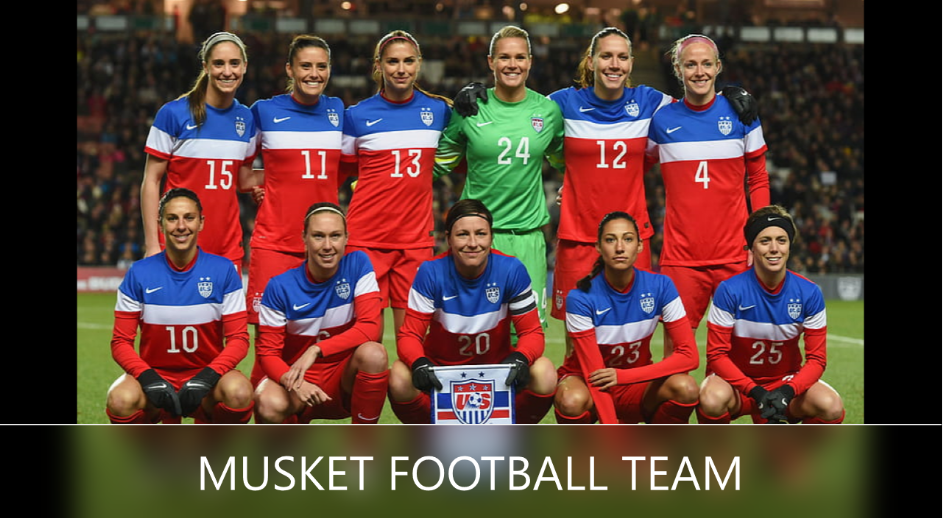

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df=pd.read_csv("Documents/Muskets_teamData_V2.csv")
df.head()

C:\Users\jgideon\AppData\Local\Temp\ipykernel_20520\3710741343.py:1: DtypeWarning: Columns (26,29,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Documents/Muskets_teamData_V2.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595


In [37]:
df.info() # To know how many colums and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              18784 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  int32  
 13  Weight            19021 non-null  int32  
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [36]:
# inspect the column to get the list of columns
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Value', 'Wage',
       'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits', 'P

# **Data preprocessing**

**Cheking for the null values**

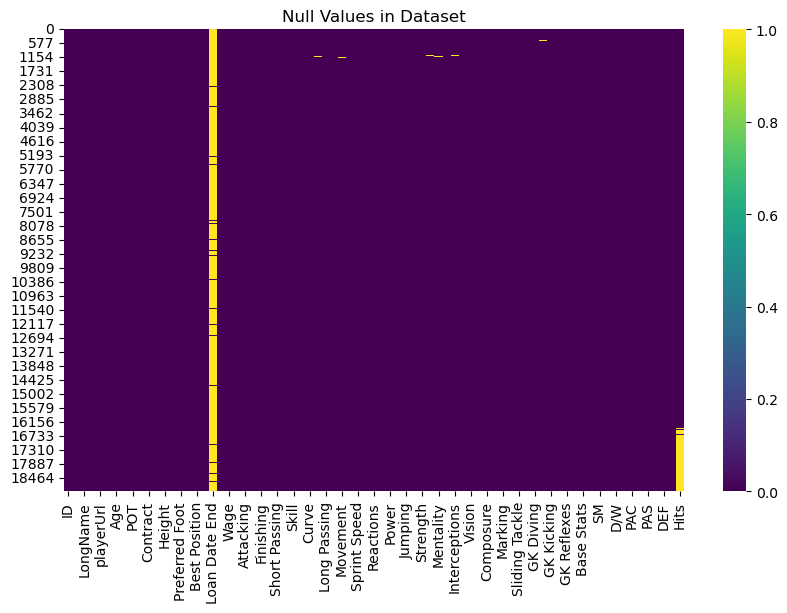

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boolean mask of null values
null_mask = df.isnull()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(null_mask, cmap='viridis')

# Set the plot title
plt.title('Null Values in Dataset')

# Display the plot
plt.show()


In [4]:
# we are finding the number of null values
df["Loan Date End"].isnull().sum()

18006

In [5]:
# # Dropping the "Loan Date End" column due to a significant number of missing values (NaN)
# it might not be feasible to impute or fill in the missing values accurately. Therefore, to avoid potential biases or 
# incorrect analysis caused by missing data,it is justifiable to drop the "Loan Date End" column from the DataFrame.
df.drop(columns=["Loan Date End"],inplace=True)

In [38]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Player Name,Player Status,RW,ST,CF,LW,GK,CAM,CM,CB,CDM,RB,RM,LM,LB,RWB,LWB
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,1-Jul-04,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel-messi,Active,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,10-Jul-18,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c-ronaldo-dos-santos-aveiro,Active,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,16-Jul-14,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan-oblak,Active,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,30-Aug-15,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin-de-bruyne,Active,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,3-Aug-17,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar-da-silva-santos-jr,Active,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

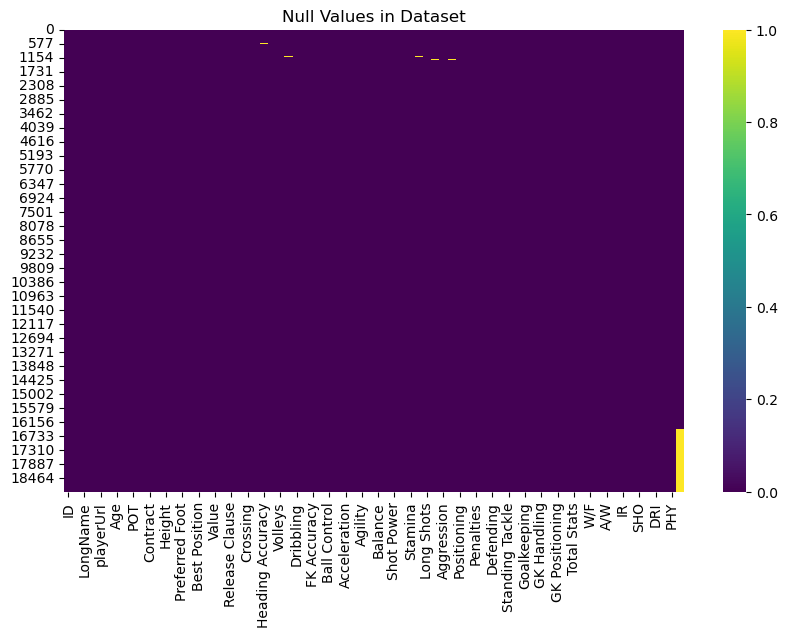

In [6]:
#it's library for ploting graphs
import seaborn as sns

# Create a boolean mask of null values
null_mask = df.isnull()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(null_mask, cmap='viridis')

# Set the plot title
plt.title('Null Values in Dataset')

# Display the plot
plt.show()


In [7]:
#check the whole data set missing values
df.isnull().sum()

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             5
DRI             2
DEF             5
PHY             1
Hits         2595
Length: 76, dtype: int64

**check min max value for preprocessing**

In [8]:
#check our data set statical measure
df.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Volleys,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,19021.000000,19021.000000,19019.000000,19020.000000,19021.000000,19020.000000,19020.000000,19016.000000,19013.000000,19014.000000,...,19019.000000,19021.000000,19020.000000,19021.000000,19018.000000,19018.000000,19016.00000,19019.000000,19016.000000,19020.000000
mean,226424.369907,25.191052,65.710027,71.133176,66.745229,248.921346,49.687907,45.841554,51.933046,42.688019,...,16.210947,16.515010,1595.203523,355.677987,67.455358,53.446472,57.67175,62.869026,49.861327,64.359832
std,27130.054102,4.709833,6.961705,6.114062,6.741702,74.252568,18.121421,19.559283,17.284129,17.635959,...,16.998521,17.846464,269.676511,40.731658,10.674755,13.821133,10.07301,9.921473,16.432098,9.598237
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,3.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.00000,25.000000,12.000000,28.000000
25%,210182.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,30.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.00000,57.000000,35.000000,58.000000
50%,232437.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,44.000000,...,11.000000,11.000000,1626.500000,356.000000,68.000000,56.000000,58.00000,64.000000,53.000000,65.000000
75%,246929.000000,29.000000,70.000000,75.000000,71.000000,297.000000,63.000000,62.000000,64.000000,56.000000,...,14.000000,14.000000,1780.000000,384.000000,75.000000,64.000000,64.00000,69.000000,63.000000,71.000000
max,259216.000000,53.000000,93.000000,95.000000,93.000000,437.000000,94.000000,95.000000,93.000000,90.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.00000,95.000000,91.000000,91.000000


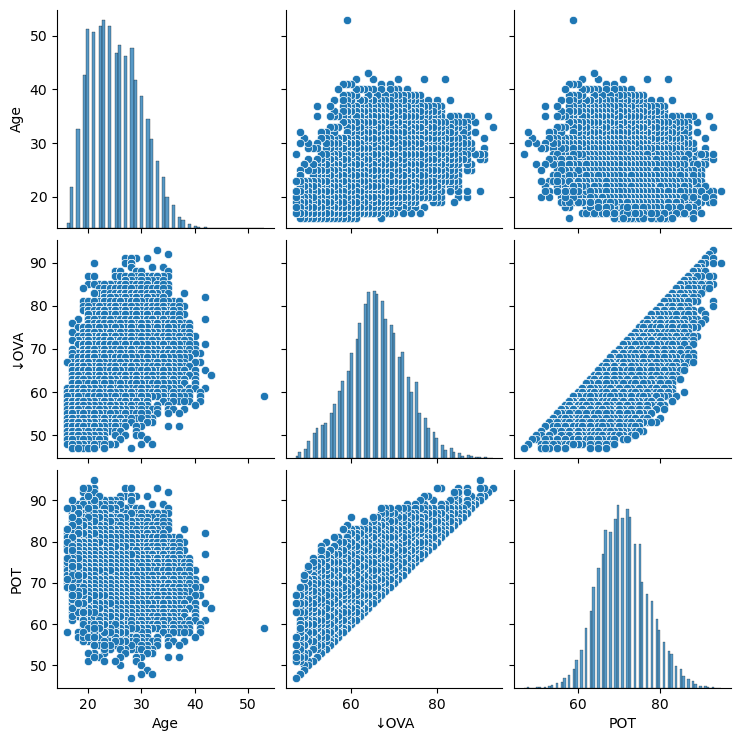

In [9]:
# check the distribution of the important columns of the data set by using pair plot of seaborn
import seaborn as sns

# Specify the columns to include in the pair plot
columns = ['Age', '↓OVA', 'POT', 'Value', 'Wage', 'Hits']

# Create a subset of the DataFrame with the selected columns
subset = df[columns]

# Create the pair plot
sns.pairplot(subset)

# Display the plot
plt.show()


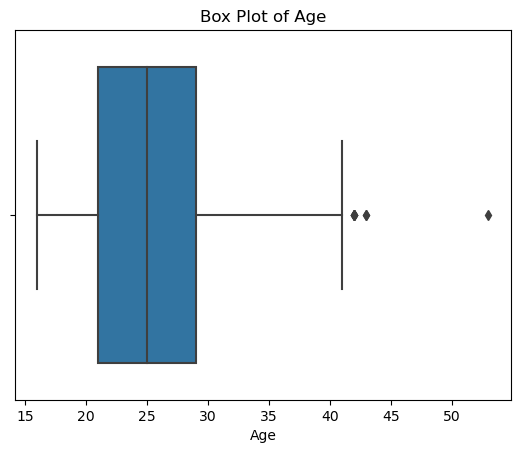

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the column name for which you want to create a box plot
column = 'Age'

# Create the box plot
sns.boxplot(x=df[column])

# Set the plot title
plt.title(f'Box Plot of {column}')

# Display the plot
plt.show()


In [ ]:
#SUB TASK

# Question 1: Extract the player names from the PlayerUrl column and create a new column name Player Name from the extracts

First extract the player names from the "PlayerUrl" column and create a new column named "Player Name" from the extracted values.

In [27]:
# Checking the PlayerUrl so it can be seen as an array
df.playerUrl.values

array(['http://sofifa.com/player/158023/lionel-messi/210006/',
       'http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/',
       'http://sofifa.com/player/200389/jan-oblak/210006/', ...,
       'http://sofifa.com/player/252757/ronan-mckinley/210006/',
       'http://sofifa.com/player/243790/zhenao-wang/210006/',
       'http://sofifa.com/player/252520/xiao-zhou/210006/'], dtype=object)

In [11]:
# Function to extract player names from PlayerUrl column
df["Player Name"]=df["playerUrl"].str.split("/").str[5]

In [12]:
#check the first top row of the dataset
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Player Name
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel-messi
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c-ronaldo-dos-santos-aveiro
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan-oblak
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin-de-bruyne
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar-da-silva-santos-jr


In [ ]:
#SUB TASK

# Question 2: Create a new column titled Player Status from the CONTRACT column with 3 labels ;
# a. 'Active' If the player has an active contract
# b. 'Free', if the player is free
# c. 'On Loan' if the player is on loan

**Create a new column titled "Player Status" based on the "Contract" column with three labels: 'Active' if the player has an active contract, 'Free' if the player is free, and 'On Loan' if the player is on loan**

In [28]:
# To check for missing values in the colum - CONTRACT
df['Contract'].isna().sum()

0

In [29]:
# To see the nature of the data inorder to know how to categories the 3 values(Active, Loan and Free) into a column
df.Contract.unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [13]:
# If the contract contains the string "Free", the function assigns the label "Free".
# If the contract contains the string "Loan", the function assigns the label "On Loan".
# If neither "Free" nor "Loan" is found in the contract, the function assumes the player has an active contract and assigns the label "Active".
# Function to map contract status to labels


def get_player_status(contract):
    if 'Free' in contract:
        return 'Free'
    elif 'Loan' in contract:
        return 'On Loan'
    else:
        return 'Active'



# The function is then applied to the "Contract" column of the DataFrame df using the apply function.
# The resulting labels are stored in a new column called "Player Status", which represents the contract status of each player.
# Apply the function to create the Player Status column

df['Player Status'] = df['Contract'].apply(get_player_status)


In [14]:
#cheking the sample from the dataset
df.sample(15)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Player Name,Player Status
546,228941,André Silva,André Miguel Valente da Silva,https://cdn.sofifa.com/players/228/941/21_60.png,http://sofifa.com/player/228941/andre-miguel-v...,Portugal,24,79.0,84.0,\n\n\n\nEintracht Frankfurt,...,2 ★,71.0,79.0,64.0,79.0,43.0,75.0,118,andre-miguel-valente-da-silva,Active
17831,242366,T. Sang,Tom Sang,https://cdn.sofifa.com/players/242/366/21_60.png,http://sofifa.com/player/242366/tom-sang/210006/,England,21,55.0,70.0,\n\n\n\nCheltenham Town,...,1 ★,61.0,33.0,48.0,50.0,53.0,60.0,NaN,tom-sang,On Loan
4896,244068,K. Schlotterbeck,Keven Schlotterbeck,https://cdn.sofifa.com/players/244/068/21_60.png,http://sofifa.com/player/244068/keven-schlotte...,Germany,23,70.0,75.0,\n\n\n\nSC Freiburg,...,1 ★,66.0,22.0,51.0,49.0,73.0,70.0,37,keven-schlotterbeck,Active
9129,235244,R. Nicolaisen,Rasmus Nicolaisen,https://cdn.sofifa.com/players/235/244/21_60.png,http://sofifa.com/player/235244/rasmus-nicolai...,Denmark,23,66.0,73.0,\n\n\n\nPortsmouth,...,1 ★,68.0,41.0,51.0,56.0,66.0,72.0,12,rasmus-nicolaisen,On Loan
11674,255445,O. Kolskogen,Ole Martin Kolskogen,https://cdn.sofifa.com/players/255/445/21_60.png,http://sofifa.com/player/255445/ole-martin-kol...,Norway,19,64.0,77.0,\n\n\n\nSK Brann,...,1 ★,72.0,37.0,42.0,53.0,64.0,66.0,12,ole-martin-kolskogen,Active
8825,167512,S. Whalley,Shaun Whalley,https://cdn.sofifa.com/players/167/512/21_60.png,http://sofifa.com/player/167512/shaun-whalley/...,England,32,66.0,66.0,\n\n\n\nShrewsbury,...,1 ★,87.0,59.0,59.0,67.0,37.0,62.0,1,shaun-whalley,Active
1706,225653,G. Kerk,Gyrano Kerk,https://cdn.sofifa.com/players/225/653/21_60.png,http://sofifa.com/player/225653/gyrano-kerk/21...,Netherlands,24,75.0,80.0,\n\n\n\nFC Utrecht,...,1 ★,93.0,71.0,65.0,76.0,34.0,70.0,36,gyrano-kerk,Active
4989,215178,E. Godoy,Erik Godoy,https://cdn.sofifa.com/players/215/178/21_60.png,http://sofifa.com/player/215178/erik-godoy/210...,Argentina,26,70.0,73.0,\n\n\n\nVancouver Whitecaps FC,...,1 ★,61.0,32.0,55.0,51.0,69.0,78.0,8,erik-godoy,Active
10493,220140,F. Kent,Frankie Kent,https://cdn.sofifa.com/players/220/140/21_60.png,http://sofifa.com/player/220140/frankie-kent/2...,England,24,65.0,72.0,\n\n\n\nPeterborough United,...,1 ★,64.0,30.0,48.0,56.0,65.0,72.0,8,frankie-kent,Active
6574,239669,J. Levi,Jonathan Levi,https://cdn.sofifa.com/players/239/669/21_60.png,http://sofifa.com/player/239669/jonathan-levi/...,Sweden,24,68.0,73.0,\n\n\n\nIFK Norrköping,...,1 ★,79.0,67.0,62.0,69.0,34.0,56.0,5,jonathan-levi,Active


In [15]:
# Count the occurrences of each player status
df['Player Status'].value_counts()

Active     17769
On Loan     1015
Free         237
Name: Player Status, dtype: int64

In [30]:
# Check players that active
df.values[4000]

array([202601, 'H. Abd Elhamed', 'Hatem Abd Elhamed',
       'https://cdn.sofifa.com/players/202/601/21_60.png',
       'http://sofifa.com/player/202601/hatem-abd-elhamed/210006/',
       'Israel', 29, 71.0, 71.0, 'Celtic', '2019 ~ 2023', 'RB, CB', 188,
       80, 'Right', 71, 'RB', '24-Jul-19', '€1.6M', '€29K', '€3.6M',
       287.0, 71.0, 38.0, 67.0, '67', 44.0, 315.0, '69', 64.0, 47.0, 65.0,
       70.0, 358.0, 76.0, 75.0, 73.0, 60.0, 74.0, 311.0, 66.0, 64.0, 67.0,
       71.0, 43.0, 303.0, 74, 68.0, 54.0, 55, 52.0, 62.0, 208.0, 69.0,
       70.0, 69.0, 60.0, 14.0, 14.0, 7.0, 14.0, 11, 1842.0, 394, '3 ★',
       '3★', 'High', 'High', '1 ★', 75.0, 46.0, 64.0, 70.0, 69.0, 70.0,
       '11', 'hatem-abd-elhamed', 'Active', False, False, False, False,
       False, False, False, True, False, True, False, False, False, False,
       False], dtype=object)

In [16]:
#Extract the "Club" name from the dataset
df["Club"]=df["Club"].str.split('\n').str[4]

In [ ]:
#SUB TASK

# Question 3: Unpack the POSITIONS column into as many columns as there are positions and assign Boolean 
# values in the columns for each player as appropriate. Name the columns the play position


**Unpack the "POSITIONS" column into as many columns as there are positions and assign Boolean values in the columns for each player as appropriate. Name the columns based on the player's position.
here is full form of the "position" DM (CDM / LDM / RDM) – Defensive Midfielder (Central Defensive Midfielder / Left (off-centre) Defensive Midfielder / Right (off-centre) Defensive Midfielder). CM (CM / LCM / RCM) – Centre Midfielder (Central Centre Midfielder / Left (off-centre) Centre Midfielder / Right (off-centre) Centre Midfielder).**

In [31]:
df.Positions

0        RW, ST, CF
1            ST, LW
2                GK
3           CAM, CM
4           LW, CAM
            ...    
19016            CB
19017            CM
19018            CM
19019            RW
19020        CB, LB
Name: Positions, Length: 19021, dtype: object

In [32]:
df.Positions.unique()

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

In [18]:
# Function to unpack positions and create boolean columns
def unpack_positions(positions):
    # Split the positions string into a list of individual positions
    position_list = positions.split(', ')
    # Iterate over each position
    for position in position_list:
        # Create a new column in the DataFrame and assign a boolean value
        # based on whether the position is present in the "Positions" column
        df[position] = df['Positions'].apply(lambda x: position in x)

# Apply the function to unpack positions and create columns
df['Positions'].apply(unpack_positions)

0        None
1        None
2        None
3        None
4        None
         ... 
19016    None
19017    None
19018    None
19019    None
19020    None
Name: Positions, Length: 19021, dtype: object

In [33]:
df.Positions.values[0:5]

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM'], dtype=object)

In [ ]:
#SUB TASK

# Question 4: Weight and Height, W/F, SM and IR Columns: convert to integers

**Convert data types:**
- Convert the "Weight" and "Height" columns to integers.

In [19]:
# Remove 'kg' from the 'Weight' column and convert it to numeric values
df['Weight']=df['Weight'].str.replace('kg', '')

In [20]:
#by using this code check the full columns if our dataframe have so many columns
pd.set_option('display.max_columns', None)

In [21]:
def extract_numeric_value(value):
    numeric_part = re.findall(r'\d+', str(value))  # Extracts the first numeric part from the given value using regular expressions
    if len(numeric_part) > 0:  # Checks if a numeric part is found
        return int(numeric_part[0])  # Returns the first numeric part as an integer
    else:
        return np.nan  # Returns np.nan when no numeric part is found


In [22]:
#apply the above function
df['Weight'] = df['Weight'].apply(extract_numeric_value).fillna(0).astype(int)

**Also the change the data type of the "Height column"**

In [23]:
# Remove 'cm' from the 'Height' column
df['Height']=df['Height'].str.replace('cm', '')


In [24]:
def extract_numeric_value(value):
    numeric_part = re.findall(r'\d+', str(value))  # Extracts the first numeric part from the given value using regular expressions
    if len(numeric_part) > 0:  # Checks if a numeric part is found
        return int(numeric_part[0])  # Returns the first numeric part as an integer
    else:
        return np.nan  # Returns np.nan when no numeric part is found


In [25]:
# apply the above code for changing it into numerical data type and filling value with 0
df['Height'] = df['Height'].apply(extract_numeric_value).fillna(0).astype(int)

**Convert the values in the "W/F," "SM," and "IR" columns to integers.**

In [43]:
df['W/F'] = df['W/F'].apply(lambda x: int(float(str(x).replace('★', ''))) if not pd.isnull(x) else None)
df['SM'] = df['SM'].apply(lambda x: int(float(str(x).replace('★', ''))) if not pd.isnull(x) else None)
df['IR'] = df['IR'].apply(lambda x: int(float(str(x).replace('★', ''))) if not pd.isnull(x) else None)

#The above code removes the '★' symbol from the values in the 'W/F', 'SM', and 'IR' columns of the DataFrame df and converts them to integers

In [44]:
#in this cell we are checking the data type  of the our dataset which is convert it in above like "W/F","SM" and "IR"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  int64  
 13  Weight            19021 non-null  int64  
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [45]:
#check the data type of all the column by using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  int64  
 13  Weight            19021 non-null  int64  
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [ ]:
#SUB TASK

# Question 5 Value, Wage and Release Clause columns: convert to Float 

**Convert the "Value," "Wage," and "Release Clause" columns to float data type.**

In [34]:
# Inspecting the Value column
df.Value.unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [46]:
## Remove '€' symbol and convert 'M' to 'e6' and 'K' to 'e3' in the 'Value' column
df['Value'] = df['Value'].str.replace('€', '').str.replace('M', 'e6').str.replace('K', 'e3').astype(float)

# Remove '€' symbol and convert 'K' to 'e3' in the 'Wage' column
df['Wage'] = df['Wage'].str.replace('€', '').str.replace('K', 'e3').astype(float)


#what working of the above code:----
# The 'Value' column will contain numeric values representing monetary amounts,
# where 'M' is replaced with 'e6' to represent million and 'K' is replaced with 'e3' to represent thousand.
# Similarly, the 'Wage' column will contain numeric values representing wage amounts

In [47]:
#string replacement operations (str.replace()) to clean the 'Release Clause' column. It removes the '€' symbol, replaces 'M' with 'e6', and replaces 'K' with 'e3' to convert the values to numeric representations in millions and thousands.
df['Release Clause'] = df['Release Clause'].str.replace('€', '').str.replace('M', 'e6').str.replace('K', 'e3')
df['Release Clause'] = pd.to_numeric(df['Release Clause'], errors='coerce')


In [48]:
#check dtype
print(df['Value'].dtype)

float64


In [49]:
#check dtype
print(df['Release Clause'].dtype)

float64


In [50]:
#Convert the dtype of the "Hits" Columns and also the "K" value
df["Hits"]

0        771
1        562
2        150
3        207
4        595
        ... 
19016    NaN
19017    NaN
19018    NaN
19019    NaN
19020    NaN
Name: Hits, Length: 19021, dtype: object

In [51]:
def convert_hits(value):
    if isinstance(value, str):  # Checks if the value is a string
        if 'K' in value:  # Checks if the value contains 'K'
            return float(value.replace('K', '')) * 1000  # Converts the value to float and multiplies it by 1000 to convert from 'K' to actual hits count
        else:
            return float(value)  # Converts the value to float
    else:
        return value  # Returns the value as is if it is not a string

df['Hits'] = df['Hits'].apply(convert_hits)  # Applies the 'convert_hits' function to the 'Hits' column of the DataFrame


#Code Working;-----
# The above code defines a function convert_hits that converts the values in the 'Hits' column to actual hit counts.
# The function checks if the value is a string and if it contains 'K'. If so, it removes the 'K' character,
# converts the value to float, and multiplies it by 1000 to convert from 'K' to the actual hits count.
# If the value is not a string, it is returned as is.

In [52]:
#check the "Hits" Column dtype
df["Hits"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19021 entries, 0 to 19020
Series name: Hits
Non-Null Count  Dtype  
--------------  -----  
16426 non-null  float64
dtypes: float64(1)
memory usage: 148.7 KB


In [ ]:
# SUB TASK

#Question 7: Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into
#which you convert the respective values into clusters/labels as follows

# a. Height: Bucket intervals of 10 years
# b. Weight: Bucket intervals of 10 kg
# c. Wage: bucket intervals of 50K
# d. Value: bucket intervals of 50M
# e. Release Clause: bucket intervals of 50M 


**Create categorical columns for "Height," "Weight," "Release Clause," "Value," and "Wage" by converting the respective values into clusters or labels.**

In [35]:
# Inspect the Height column
df.Height.unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166,   6, 164, 198,
         5, 201, 158, 162, 161, 160, 203, 157, 156, 202, 159, 206, 155])

In [53]:
# Create categorical columns using pd.cut()
df['Height Category'] = pd.cut(df['Height'], bins=range(150, 210, 10), labels=False)
df['Weight Category'] = pd.cut(df['Weight'], bins=range(50, 150, 10), labels=False)
df['Release Clause Category'] = pd.cut(df['Release Clause'], bins=range(0, 1000, 50), labels=False)
df['Value Category'] = pd.cut(df['Value'], bins=range(0, 1000, 50), labels=False)
df['Wage Category'] = pd.cut(df['Wage'], bins=range(0, 1000, 50), labels=False)


#Code Working:-----
# '''The code uses the pd.cut() function from pandas to create categorical columns based on specified bins.
# Each line creates a new column by categorizing the values of a specific column into bins.
# The bins are defined using the bins parameter, which specifies the range and step size for creating the bins.
# The labels=False argument is used to assign integer labels to the categories instead of using bin labels'''


# **Bonus: Creating Machine Learning Model**
## **Import Library**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

### **Data Preprocessing and Machine Learning LinearRegression Model creating**

In [ ]:
# Select the features and target variable
numeric_features = ['Age', 'POT', 'Height', 'Weight']

categorical_features = ['Club', 'Positions', 'Preferred Foot']

target = 'Hits'

# Remove rows with missing target values
df.dropna(subset=[target], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[numeric_features + categorical_features], df[target], test_size=0.2, random_state=42)

# Define the preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Apply the transformers to the respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the machine learning model
model = LinearRegression()

# Create the machine learning pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
score = pipeline.score(X_test, y_test)
print(f"R^2 score: {score:.2f}")


#**Check Prediction for the new data**
- please give the input the as below columns format like
- > [ 'Age', 'POT', 'Height', 'Weight', 'Club', 'Positions', 'Preferred Foot']

Example :-
> [28, 92, 185, 75, 'FC Barcelona', 'RW, CF', 'Right']

In [ ]:
import pandas as pd

# Create a new DataFrame with the same column names as the training data
new_data = pd.DataFrame(columns=['Age', 'POT', 'Height', 'Weight', 'Club', 'Positions', 'Preferred Foot'])

# Fill in the values for each column based on the new data
new_data.loc[0] = [32, 92, 185, 75, 'Manchester City', 'RW, CF', 'Left']

# Use the trained pipeline to make predictions on the new data
predictions = pipeline.predict(new_data)

print(predictions)

## **Data Preprocessing and Apply Second Machine Learning Model RandomForest**

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Select the relevant columns for modeling
columns = ['Age', 'POT', 'Club', 'Positions', 'Height', 'Weight', 'Preferred Foot', 'Value', 'Wage', 'Hits']

# Create the feature matrix X and the target variable y
X = df[columns[:-1]]
y = df[columns[-1]]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for numerical and categorical features
numeric_features = ['Age', 'POT', 'Height', 'Weight']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Club', 'Positions', 'Preferred Foot']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the Random Forest regression model
model = RandomForestRegressor(random_state=42)

# Create the machine learning pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)


R^2 score: 0.1707943251303654


## **Check Prediction for the new data**
- please give the input the as below columns format like
- > [ 'Age', 'POT', 'Height', 'Weight', 'Club', 'Positions', 'Preferred Foot']

Example :-
> [28, 92, 185, 75, 'FC Barcelona', 'RW, CF', 'Right']

## **This is code for checking prediction when we give the new input**

In [89]:
import pandas as pd

# Create a new DataFrame with the same column names as the training data
new_data = pd.DataFrame(columns=['Age', 'POT', 'Height', 'Weight', 'Club', 'Positions', 'Preferred Foot'])

# Fill in the values for each column based on the new data
new_data.loc[0] = [32,92,185,75,'Manchester City','RW, CF','Left']

# Use the trained pipeline to make predictions on the new data
predictions = pipeline.predict(new_data)

print(predictions)


[224.7685026]


## **Check Total Hits by giving the name of player**
Write the player's name in the form where the data frame contains the Name and Longname columns

In [90]:
def get_hits_by_name(player_name):
    # Filter the data for the specified player name in both "Name" and "LongName" columns
    player_data = df[df['Name'].str.contains(player_name, case=False) | df['LongName'].str.contains(player_name, case=False)]

    if player_data.empty:
        return "Player not found."

    # Get the total number of hits for the player
    total_hits = player_data['Hits'].sum()

    return total_hits


# Prompt the user to enter the player name
player_name = input("Enter the name of the player: ")

# Get the total number of hits for the specified player name
hits = get_hits_by_name(player_name)
if isinstance(hits, str):
    print(hits)
else:
    print(f"Total Hits: {hits}")

Enter the name of the player: Neymar Jr
Total Hits: 595.0
